# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'mf_chm_STD', 'r_MIN', 'b_STD', 'b_MAX', 'contr_r_STD', 'contr_g_MIN', 'corr_r_Q25', 'corr_r_MIN'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,mf_chm_STD,r_MIN,b_STD,b_MAX,contr_r_STD,contr_g_MIN,corr_r_Q25,corr_r_MIN
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.445070,4.193715,13,35.145074,232,360.273487,9.634772,0.488754,0.072792
1,8.189,9.622,2005,818,0.59,2.92,2.47,12.465903,0.932190,24,36.135511,191,323.958625,17.242392,0.501683,0.098347
2,8.380,9.589,2001,818,0.78,2.88,2.44,13.028298,0.846132,18,35.938764,187,299.438354,81.325912,0.540056,0.187811
3,8.137,9.449,2040,833,0.52,2.72,2.55,2.128231,1.873981,15,35.908361,199,319.773395,7.830567,0.480991,0.020686
4,7.696,9.401,1758,717,0.22,2.83,2.14,12.171553,1.057209,8,38.062522,207,353.104284,13.923030,0.505257,0.106549


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   mf_chm_STD     103 non-null    float64
 9   r_MIN          103 non-null    int64  
 10  b_STD          103 non-null    float64
 11  b_MAX          103 non-null    int64  
 12  contr_r_STD    103 non-null    float64
 13  contr_g_MIN    103 non-null    float64
 14  corr_r_Q25     103 non-null    float64
 15  corr_r_MIN     103 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 13.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_19146/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,mf_chm_STD,r_MIN,b_STD,b_MAX,contr_r_STD,contr_g_MIN,corr_r_Q25,corr_r_MIN
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,3.368496,2.382738,11.378641,35.164575,214.495146,327.115078,34.507341,0.393571,0.073579
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,4.845054,1.319795,9.139568,5.338700,21.437951,167.617957,48.235073,0.151801,0.056017
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.018586,0.531612,2.000000,20.570709,152.000000,0.091058,0.627999,0.033797,-0.062450
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.482279,1.340784,5.000000,31.746440,199.000000,283.887328,4.812362,0.407228,0.027204
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.642883,2.048168,8.000000,36.135511,212.000000,353.034542,17.059975,0.449670,0.063714
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,3.921804,3.059823,15.000000,39.139044,234.500000,448.017711,45.575140,0.476635,0.110983
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,17.862923,7.129900,56.000000,45.825416,251.000000,652.546648,243.635666,0.555648,0.241284


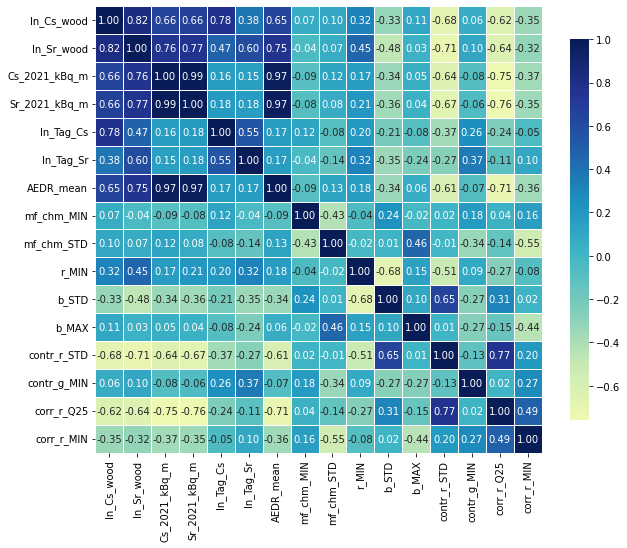

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['mf_chm_MIN', 'mf_chm_STD', 'r_MIN', 'b_STD', 'b_MAX', 'contr_r_STD', 'contr_g_MIN', 'corr_r_Q25', 'corr_r_MIN'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,mf_chm_MIN,mf_chm_STD,r_MIN,b_STD,b_MAX,contr_r_STD,contr_g_MIN,corr_r_Q25,corr_r_MIN,Random1,Random2,Random3,Random4,Random5
0,0.445070,4.193715,13,35.145074,232,360.273487,9.634772,0.488754,0.072792,8.877820,7.998223,6.765805,11.290737,8.639922
1,12.465903,0.932190,24,36.135511,191,323.958625,17.242392,0.501683,0.098347,7.619885,8.822522,10.505884,8.690219,10.154824
2,13.028298,0.846132,18,35.938764,187,299.438354,81.325912,0.540056,0.187811,8.301205,12.111587,14.127391,11.664409,7.346151
3,2.128231,1.873981,15,35.908361,199,319.773395,7.830567,0.480991,0.020686,8.796468,9.552652,8.854032,6.667729,12.252798
4,12.171553,1.057209,8,38.062522,207,353.104284,13.923030,0.505257,0.106549,9.146972,8.426566,11.636439,10.812258,9.905851


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.22061427224723862, 0.04003302656805319, -0.4547668522628714]
    Mean: -0.065
    Std: 0.285

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.09059602 0.89518631 1.13861233]
    Mean: 1.041
    Std: 0.105

 --------------------
Mean absolute error (MAE): 

    Scores: [1.01211047928461, 0.9355471070998294, 0.8126008568353513]
    Mean: 0.920
    Std: 0.082

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.308 (std: 0.571)
Parameters: {'colsample_bytree': 0.5846807009805568, 'gamma': 0.21190940415782733, 'learning_rate': 0.2747970437113893, 'max_depth': 4, 'n_estimators': 137, 'subsample': 0.5854744657798079}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.32796674, 0.16403337, 0.55658174, 0.291291  , 0.3366241 ,
       0.36441031, 0.32786403, 0.56870251, 0.54995675, 0.35893373]), 'std_fit_time': array([0.07139198, 0.00853936, 0.1516918 , 0.03858647, 0.00442285,
       0.14746558, 0.03571974, 0.16324736, 0.0865042 , 0.01192299]), 'mean_score_time': array([0.00634432, 0.00627313, 0.00727339, 0.00812507, 0.00616708,
       0.00820227, 0.00835128, 0.00641522, 0.00684419, 0.00629392]), 'std_score_time': array([1.36055187e-04, 1.38813562e-04, 1.89661674e-03, 3.79294401e-03,
       4.84417271e-05, 2.61066902e-03, 3.48214212e-03, 1.15258120e-04,
       2.92949968e-04, 1.20886505e-04]), 'param_colsample_bytree': masked_array(data=[0.9419339148869215, 0.918910228766162,
                   0.34886761737810357, 0.777108963096364,
                   0.36393232783491897, 0.8825540851696636,
                   0.702307953688953, 0.7429992147227029,
                   0.7498026646295041, 0.5846807009805568],
             mask

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.5846807009805568
Gamma: 0.21190940415782733
Learning_rate: 0.2747970437113893
Max_depth: 4
N_estimators: 137
Subsample: 0.5854744657798079


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.10267	validation_1-rmse:1.35948
[1]	validation_0-rmse:0.95577	validation_1-rmse:1.31422
[2]	validation_0-rmse:0.86997	validation_1-rmse:1.27604


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.79707	validation_1-rmse:1.23594
[4]	validation_0-rmse:0.71249	validation_1-rmse:1.16700
[5]	validation_0-rmse:0.65373	validation_1-rmse:1.15109
[6]	validation_0-rmse:0.57006	validation_1-rmse:1.09763
[7]	validation_0-rmse:0.51805	validation_1-rmse:1.07584
[8]	validation_0-rmse:0.46454	validation_1-rmse:1.07146
[9]	validation_0-rmse:0.41548	validation_1-rmse:1.03335
[10]	validation_0-rmse:0.39866	validation_1-rmse:1.03750
[11]	validation_0-rmse:0.39460	validation_1-rmse:1.03814
[12]	validation_0-rmse:0.35591	validation_1-rmse:1.05142
[13]	validation_0-rmse:0.33657	validation_1-rmse:1.05121
[14]	validation_0-rmse:0.32387	validation_1-rmse:1.03668
[15]	validation_0-rmse:0.31276	validation_1-rmse:1.02648
[16]	validation_0-rmse:0.30117	validation_1-rmse:1.01462
[17]	validation_0-rmse:0.29728	validation_1-rmse:1.01472
[18]	validation_0-rmse:0.28993	validation_1-rmse:1.01091
[19]	validation_0-rmse:0.28138	validation_1-rmse:1.01688
[20]	validation_0-rmse:0.26895	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.63400	validation_1-rmse:0.93895
[5]	validation_0-rmse:0.59955	validation_1-rmse:0.94240
[6]	validation_0-rmse:0.56271	validation_1-rmse:0.98889
[7]	validation_0-rmse:0.50620	validation_1-rmse:0.99005
[8]	validation_0-rmse:0.45791	validation_1-rmse:0.99258
[9]	validation_0-rmse:0.43230	validation_1-rmse:1.01073
[10]	validation_0-rmse:0.39595	validation_1-rmse:0.98326
[11]	validation_0-rmse:0.37322	validation_1-rmse:0.96923
[12]	validation_0-rmse:0.35480	validation_1-rmse:0.96960
[13]	validation_0-rmse:0.33977	validation_1-rmse:0.94975
[14]	validation_0-rmse:0.32396	validation_1-rmse:0.97864
[15]	validation_0-rmse:0.31469	validation_1-rmse:0.98862
[16]	validation_0-rmse:0.30249	validation_1-rmse:0.97001
[17]	validation_0-rmse:0.28337	validation_1-rmse:0.99207
[18]	validation_0-rmse:0.27279	validation_1-rmse:1.00875
[19]	validation_0-rmse:0.26002	validation_1-rmse:1.01345
[20]	validation_0-rmse:0.25503	validation_1-rmse:1.01176
[21]	validation_0-rmse:0.24811	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.63664	validation_1-rmse:0.99738
[6]	validation_0-rmse:0.58173	validation_1-rmse:0.97745
[7]	validation_0-rmse:0.53273	validation_1-rmse:0.97503
[8]	validation_0-rmse:0.50532	validation_1-rmse:0.92997
[9]	validation_0-rmse:0.47858	validation_1-rmse:0.91787
[10]	validation_0-rmse:0.44431	validation_1-rmse:0.89763
[11]	validation_0-rmse:0.42381	validation_1-rmse:0.89208
[12]	validation_0-rmse:0.39561	validation_1-rmse:0.87223
[13]	validation_0-rmse:0.37872	validation_1-rmse:0.85968
[14]	validation_0-rmse:0.35780	validation_1-rmse:0.87169
[15]	validation_0-rmse:0.33620	validation_1-rmse:0.88688
[16]	validation_0-rmse:0.31225	validation_1-rmse:0.89476
[17]	validation_0-rmse:0.29691	validation_1-rmse:0.90716
[18]	validation_0-rmse:0.29233	validation_1-rmse:0.89471
[19]	validation_0-rmse:0.27801	validation_1-rmse:0.91563
[20]	validation_0-rmse:0.25961	validation_1-rmse:0.89912
[21]	validation_0-rmse:0.24818	validation_1-rmse:0.90133
[22]	validation_0-rmse:0.24021	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.49545	validation_1-rmse:1.26929
[7]	validation_0-rmse:0.47869	validation_1-rmse:1.27100
[8]	validation_0-rmse:0.42081	validation_1-rmse:1.25284
[9]	validation_0-rmse:0.40224	validation_1-rmse:1.25500
[10]	validation_0-rmse:0.36905	validation_1-rmse:1.27027
[11]	validation_0-rmse:0.34945	validation_1-rmse:1.26284
[12]	validation_0-rmse:0.32342	validation_1-rmse:1.27197
[13]	validation_0-rmse:0.30691	validation_1-rmse:1.31175
[14]	validation_0-rmse:0.29313	validation_1-rmse:1.32123
[15]	validation_0-rmse:0.28868	validation_1-rmse:1.32753
[16]	validation_0-rmse:0.26319	validation_1-rmse:1.33879
[17]	validation_0-rmse:0.24489	validation_1-rmse:1.35111
[18]	validation_0-rmse:0.24573	validation_1-rmse:1.35325
[19]	validation_0-rmse:0.23481	validation_1-rmse:1.35437
[20]	validation_0-rmse:0.22968	validation_1-rmse:1.36307
[21]	validation_0-rmse:0.22387	validation_1-rmse:1.37263
[22]	validation_0-rmse:0.21655	validation_1-rmse:1.37436
[23]	validation_0-rmse:0.21663	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.47570	validation_1-rmse:1.10796
[8]	validation_0-rmse:0.43310	validation_1-rmse:1.06987
[9]	validation_0-rmse:0.41652	validation_1-rmse:1.06849
[10]	validation_0-rmse:0.39594	validation_1-rmse:1.06849
[11]	validation_0-rmse:0.38138	validation_1-rmse:1.07643
[12]	validation_0-rmse:0.35228	validation_1-rmse:1.09828
[13]	validation_0-rmse:0.33247	validation_1-rmse:1.08363
[14]	validation_0-rmse:0.31079	validation_1-rmse:1.08498
[15]	validation_0-rmse:0.30089	validation_1-rmse:1.10223
[16]	validation_0-rmse:0.27812	validation_1-rmse:1.11324
[17]	validation_0-rmse:0.25585	validation_1-rmse:1.10993
[18]	validation_0-rmse:0.24725	validation_1-rmse:1.10424
[19]	validation_0-rmse:0.24207	validation_1-rmse:1.10956
[20]	validation_0-rmse:0.23148	validation_1-rmse:1.09785
[21]	validation_0-rmse:0.22307	validation_1-rmse:1.10070
[22]	validation_0-rmse:0.22178	validation_1-rmse:1.09649
[23]	validation_0-rmse:0.21897	validation_1-rmse:1.08540
[24]	validation_0-rmse:0.21001	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.90541	validation_1-rmse:1.25445
[3]	validation_0-rmse:0.81548	validation_1-rmse:1.25311
[4]	validation_0-rmse:0.74183	validation_1-rmse:1.17078
[5]	validation_0-rmse:0.69603	validation_1-rmse:1.15196
[6]	validation_0-rmse:0.64318	validation_1-rmse:1.16279
[7]	validation_0-rmse:0.60691	validation_1-rmse:1.15255
[8]	validation_0-rmse:0.51803	validation_1-rmse:1.16771
[9]	validation_0-rmse:0.47191	validation_1-rmse:1.16135
[10]	validation_0-rmse:0.43436	validation_1-rmse:1.17314
[11]	validation_0-rmse:0.41442	validation_1-rmse:1.16821
[12]	validation_0-rmse:0.37547	validation_1-rmse:1.16359
[13]	validation_0-rmse:0.35300	validation_1-rmse:1.17134
[14]	validation_0-rmse:0.33674	validation_1-rmse:1.16711
[15]	validation_0-rmse:0.32991	validation_1-rmse:1.18415
[16]	validation_0-rmse:0.31441	validation_1-rmse:1.20765
[17]	validation_0-rmse:0.29443	validation_1-rmse:1.20571
[18]	validation_0-rmse:0.26789	validation_1-rmse:1.20066
[19]	validation_0-rmse:0.25084	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.59711	validation_1-rmse:1.10157
[6]	validation_0-rmse:0.53325	validation_1-rmse:1.07203
[7]	validation_0-rmse:0.48485	validation_1-rmse:1.05130
[8]	validation_0-rmse:0.44212	validation_1-rmse:1.05866
[9]	validation_0-rmse:0.41546	validation_1-rmse:1.09760
[10]	validation_0-rmse:0.38397	validation_1-rmse:1.12398
[11]	validation_0-rmse:0.36484	validation_1-rmse:1.14620
[12]	validation_0-rmse:0.34907	validation_1-rmse:1.15312
[13]	validation_0-rmse:0.32539	validation_1-rmse:1.16409
[14]	validation_0-rmse:0.31461	validation_1-rmse:1.16117
[15]	validation_0-rmse:0.29398	validation_1-rmse:1.17533
[16]	validation_0-rmse:0.28709	validation_1-rmse:1.18036
[17]	validation_0-rmse:0.26856	validation_1-rmse:1.18013
[18]	validation_0-rmse:0.26580	validation_1-rmse:1.17578
[19]	validation_0-rmse:0.25449	validation_1-rmse:1.19574
[20]	validation_0-rmse:0.24565	validation_1-rmse:1.21209
[21]	validation_0-rmse:0.23613	validation_1-rmse:1.21181
[22]	validation_0-rmse:0.23441	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.67681	validation_1-rmse:1.21343
[5]	validation_0-rmse:0.63103	validation_1-rmse:1.19647
[6]	validation_0-rmse:0.57344	validation_1-rmse:1.18586
[7]	validation_0-rmse:0.50961	validation_1-rmse:1.17207
[8]	validation_0-rmse:0.46625	validation_1-rmse:1.16015
[9]	validation_0-rmse:0.45478	validation_1-rmse:1.15070
[10]	validation_0-rmse:0.44035	validation_1-rmse:1.17730
[11]	validation_0-rmse:0.43666	validation_1-rmse:1.20571
[12]	validation_0-rmse:0.40510	validation_1-rmse:1.21490
[13]	validation_0-rmse:0.38160	validation_1-rmse:1.23087
[14]	validation_0-rmse:0.36174	validation_1-rmse:1.21666
[15]	validation_0-rmse:0.33944	validation_1-rmse:1.22494
[16]	validation_0-rmse:0.31717	validation_1-rmse:1.21970
[17]	validation_0-rmse:0.28523	validation_1-rmse:1.21158
[18]	validation_0-rmse:0.28095	validation_1-rmse:1.19850
[19]	validation_0-rmse:0.27889	validation_1-rmse:1.19534
[20]	validation_0-rmse:0.27132	validation_1-rmse:1.20129
[21]	validation_0-rmse:0.26759	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.77176	validation_1-rmse:1.18704
[4]	validation_0-rmse:0.69588	validation_1-rmse:1.14083
[5]	validation_0-rmse:0.63367	validation_1-rmse:1.08915
[6]	validation_0-rmse:0.59912	validation_1-rmse:1.14125
[7]	validation_0-rmse:0.56442	validation_1-rmse:1.15466
[8]	validation_0-rmse:0.53279	validation_1-rmse:1.18817
[9]	validation_0-rmse:0.51112	validation_1-rmse:1.21399
[10]	validation_0-rmse:0.46155	validation_1-rmse:1.19740
[11]	validation_0-rmse:0.43382	validation_1-rmse:1.22286
[12]	validation_0-rmse:0.41067	validation_1-rmse:1.21584
[13]	validation_0-rmse:0.38596	validation_1-rmse:1.21267
[14]	validation_0-rmse:0.37824	validation_1-rmse:1.20474
[15]	validation_0-rmse:0.36991	validation_1-rmse:1.18024
[16]	validation_0-rmse:0.35093	validation_1-rmse:1.16881
[17]	validation_0-rmse:0.33591	validation_1-rmse:1.16500
[18]	validation_0-rmse:0.33203	validation_1-rmse:1.17523
[19]	validation_0-rmse:0.30703	validation_1-rmse:1.17825
[20]	validation_0-rmse:0.28184	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.15790	validation_1-rmse:1.05187
[1]	validation_0-rmse:1.01834	validation_1-rmse:0.93894
[2]	validation_0-rmse:0.88933	validation_1-rmse:0.95361
[3]	validation_0-rmse:0.78543	validation_1-rmse:0.86312
[4]	validation_0-rmse:0.71175	validation_1-rmse:0.86808
[5]	validation_0-rmse:0.64389	validation_1-rmse:0.84570
[6]	validation_0-rmse:0.61574	validation_1-rmse:0.83894
[7]	validation_0-rmse:0.57522	validation_1-rmse:0.80378
[8]	validation_0-rmse:0.52120	validation_1-rmse:0.80524
[9]	validation_0-rmse:0.48873	validation_1-rmse:0.82983
[10]	validation_0-rmse:0.45945	validation_1-rmse:0.77829
[11]	validation_0-rmse:0.41975	validation_1-rmse:0.82489
[12]	validation_0-rmse:0.38198	validation_1-rmse:0.84899
[13]	validation_0-rmse:0.35833	validation_1-rmse:0.84356
[14]	validation_0-rmse:0.35459	validation_1-rmse:0.84256
[15]	validation_0-rmse:0.34068	validation_1-rmse:0.83786
[16]	validation_0-rmse:0.30824	validation_1-rmse:0.83183
[17]	validation_0-rmse:0.29118	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.58810	validation_1-rmse:0.84448
[7]	validation_0-rmse:0.51932	validation_1-rmse:0.80317
[8]	validation_0-rmse:0.46657	validation_1-rmse:0.79759
[9]	validation_0-rmse:0.46300	validation_1-rmse:0.78213
[10]	validation_0-rmse:0.44233	validation_1-rmse:0.82448
[11]	validation_0-rmse:0.41351	validation_1-rmse:0.82140
[12]	validation_0-rmse:0.38426	validation_1-rmse:0.81850
[13]	validation_0-rmse:0.36303	validation_1-rmse:0.82384
[14]	validation_0-rmse:0.35387	validation_1-rmse:0.82049
[15]	validation_0-rmse:0.33776	validation_1-rmse:0.82747
[16]	validation_0-rmse:0.31296	validation_1-rmse:0.83684
[17]	validation_0-rmse:0.28853	validation_1-rmse:0.82430
[18]	validation_0-rmse:0.28377	validation_1-rmse:0.84122
[19]	validation_0-rmse:0.27146	validation_1-rmse:0.83449
[20]	validation_0-rmse:0.26526	validation_1-rmse:0.83813
[21]	validation_0-rmse:0.25642	validation_1-rmse:0.83960
[22]	validation_0-rmse:0.24774	validation_1-rmse:0.83777
[23]	validation_0-rmse:0.24056	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.53543	validation_1-rmse:0.99341
[6]	validation_0-rmse:0.49112	validation_1-rmse:1.00887
[7]	validation_0-rmse:0.45933	validation_1-rmse:1.03236
[8]	validation_0-rmse:0.41899	validation_1-rmse:1.02289
[9]	validation_0-rmse:0.40452	validation_1-rmse:1.02259
[10]	validation_0-rmse:0.37778	validation_1-rmse:1.02738
[11]	validation_0-rmse:0.34553	validation_1-rmse:1.05274
[12]	validation_0-rmse:0.32484	validation_1-rmse:1.04935
[13]	validation_0-rmse:0.30773	validation_1-rmse:1.03737
[14]	validation_0-rmse:0.29431	validation_1-rmse:1.04324
[15]	validation_0-rmse:0.28700	validation_1-rmse:1.04151
[16]	validation_0-rmse:0.27988	validation_1-rmse:1.03791
[17]	validation_0-rmse:0.26568	validation_1-rmse:1.03878
[18]	validation_0-rmse:0.25511	validation_1-rmse:1.04557
[19]	validation_0-rmse:0.23337	validation_1-rmse:1.06305
[20]	validation_0-rmse:0.21907	validation_1-rmse:1.07059
[21]	validation_0-rmse:0.21937	validation_1-rmse:1.07221
[22]	validation_0-rmse:0.21619	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.72629	validation_1-rmse:0.99508
[4]	validation_0-rmse:0.64598	validation_1-rmse:0.96069
[5]	validation_0-rmse:0.57009	validation_1-rmse:0.95250
[6]	validation_0-rmse:0.51631	validation_1-rmse:0.97840
[7]	validation_0-rmse:0.48247	validation_1-rmse:0.96845
[8]	validation_0-rmse:0.44304	validation_1-rmse:0.96916
[9]	validation_0-rmse:0.40468	validation_1-rmse:0.97966
[10]	validation_0-rmse:0.37329	validation_1-rmse:1.01139
[11]	validation_0-rmse:0.34678	validation_1-rmse:1.01649
[12]	validation_0-rmse:0.31363	validation_1-rmse:1.03415
[13]	validation_0-rmse:0.29750	validation_1-rmse:1.04755
[14]	validation_0-rmse:0.28589	validation_1-rmse:1.05006
[15]	validation_0-rmse:0.27236	validation_1-rmse:1.05545
[16]	validation_0-rmse:0.25933	validation_1-rmse:1.04922
[17]	validation_0-rmse:0.25080	validation_1-rmse:1.04843
[18]	validation_0-rmse:0.24890	validation_1-rmse:1.04516
[19]	validation_0-rmse:0.24464	validation_1-rmse:1.04623
[20]	validation_0-rmse:0.23990	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.66013	validation_1-rmse:1.33760
[5]	validation_0-rmse:0.59360	validation_1-rmse:1.37831
[6]	validation_0-rmse:0.54145	validation_1-rmse:1.35590
[7]	validation_0-rmse:0.48819	validation_1-rmse:1.34884
[8]	validation_0-rmse:0.44744	validation_1-rmse:1.33875
[9]	validation_0-rmse:0.42812	validation_1-rmse:1.34188
[10]	validation_0-rmse:0.38231	validation_1-rmse:1.33297
[11]	validation_0-rmse:0.35149	validation_1-rmse:1.34697
[12]	validation_0-rmse:0.33524	validation_1-rmse:1.35377
[13]	validation_0-rmse:0.31067	validation_1-rmse:1.37539
[14]	validation_0-rmse:0.28298	validation_1-rmse:1.39556
[15]	validation_0-rmse:0.26881	validation_1-rmse:1.38449
[16]	validation_0-rmse:0.25406	validation_1-rmse:1.41065
[17]	validation_0-rmse:0.24372	validation_1-rmse:1.41092
[18]	validation_0-rmse:0.23786	validation_1-rmse:1.40157
[19]	validation_0-rmse:0.22732	validation_1-rmse:1.40396
[20]	validation_0-rmse:0.22552	validation_1-rmse:1.41219
[21]	validation_0-rmse:0.21179	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.60491	validation_1-rmse:0.82855
[6]	validation_0-rmse:0.55248	validation_1-rmse:0.83427
[7]	validation_0-rmse:0.52606	validation_1-rmse:0.84258
[8]	validation_0-rmse:0.47160	validation_1-rmse:0.88948
[9]	validation_0-rmse:0.43510	validation_1-rmse:0.88875
[10]	validation_0-rmse:0.41192	validation_1-rmse:0.86810
[11]	validation_0-rmse:0.39195	validation_1-rmse:0.86884
[12]	validation_0-rmse:0.35948	validation_1-rmse:0.88284
[13]	validation_0-rmse:0.33651	validation_1-rmse:0.92098
[14]	validation_0-rmse:0.31904	validation_1-rmse:0.90522
[15]	validation_0-rmse:0.29695	validation_1-rmse:0.89986
[16]	validation_0-rmse:0.29406	validation_1-rmse:0.90391
[17]	validation_0-rmse:0.28290	validation_1-rmse:0.90198
[18]	validation_0-rmse:0.28407	validation_1-rmse:0.90299
[19]	validation_0-rmse:0.27685	validation_1-rmse:0.90349
[20]	validation_0-rmse:0.26404	validation_1-rmse:0.91787
[21]	validation_0-rmse:0.24816	validation_1-rmse:0.93696
[22]	validation_0-rmse:0.23733	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.54838	validation_1-rmse:0.91049
[8]	validation_0-rmse:0.50249	validation_1-rmse:0.90977
[9]	validation_0-rmse:0.46674	validation_1-rmse:0.92252
[10]	validation_0-rmse:0.43833	validation_1-rmse:0.88992
[11]	validation_0-rmse:0.42408	validation_1-rmse:0.88784
[12]	validation_0-rmse:0.39608	validation_1-rmse:0.90589
[13]	validation_0-rmse:0.37069	validation_1-rmse:0.89989
[14]	validation_0-rmse:0.35139	validation_1-rmse:0.90771
[15]	validation_0-rmse:0.32619	validation_1-rmse:0.90681
[16]	validation_0-rmse:0.30569	validation_1-rmse:0.89955
[17]	validation_0-rmse:0.30050	validation_1-rmse:0.90489
[18]	validation_0-rmse:0.29823	validation_1-rmse:0.89875
[19]	validation_0-rmse:0.28559	validation_1-rmse:0.89666
[20]	validation_0-rmse:0.27688	validation_1-rmse:0.90905
[21]	validation_0-rmse:0.26305	validation_1-rmse:0.91742
[22]	validation_0-rmse:0.25019	validation_1-rmse:0.92128
[23]	validation_0-rmse:0.24942	validation_1-rmse:0.92488
[24]	validation_0-rmse:0.23604	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.62430	validation_1-rmse:0.86890
[7]	validation_0-rmse:0.56022	validation_1-rmse:0.86450
[8]	validation_0-rmse:0.52740	validation_1-rmse:0.84740
[9]	validation_0-rmse:0.49530	validation_1-rmse:0.85906
[10]	validation_0-rmse:0.47185	validation_1-rmse:0.87502
[11]	validation_0-rmse:0.45358	validation_1-rmse:0.87230
[12]	validation_0-rmse:0.42068	validation_1-rmse:0.85547
[13]	validation_0-rmse:0.39198	validation_1-rmse:0.84790
[14]	validation_0-rmse:0.37938	validation_1-rmse:0.85501
[15]	validation_0-rmse:0.34652	validation_1-rmse:0.86231
[16]	validation_0-rmse:0.32452	validation_1-rmse:0.84935
[17]	validation_0-rmse:0.31149	validation_1-rmse:0.84681
[18]	validation_0-rmse:0.30189	validation_1-rmse:0.85812
[19]	validation_0-rmse:0.28756	validation_1-rmse:0.85448
[20]	validation_0-rmse:0.27918	validation_1-rmse:0.85908
[21]	validation_0-rmse:0.27195	validation_1-rmse:0.85951
[22]	validation_0-rmse:0.26364	validation_1-rmse:0.86085
[23]	validation_0-rmse:0.25209	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.60705	validation_1-rmse:1.33284
[7]	validation_0-rmse:0.58431	validation_1-rmse:1.35897
[8]	validation_0-rmse:0.52524	validation_1-rmse:1.37821
[9]	validation_0-rmse:0.51326	validation_1-rmse:1.39170
[10]	validation_0-rmse:0.47366	validation_1-rmse:1.36633
[11]	validation_0-rmse:0.43196	validation_1-rmse:1.34615
[12]	validation_0-rmse:0.41248	validation_1-rmse:1.34068
[13]	validation_0-rmse:0.38555	validation_1-rmse:1.35551
[14]	validation_0-rmse:0.36908	validation_1-rmse:1.35175
[15]	validation_0-rmse:0.35905	validation_1-rmse:1.33261
[16]	validation_0-rmse:0.33857	validation_1-rmse:1.35514
[17]	validation_0-rmse:0.30949	validation_1-rmse:1.38402
[18]	validation_0-rmse:0.30309	validation_1-rmse:1.37954
[19]	validation_0-rmse:0.29442	validation_1-rmse:1.38236
[20]	validation_0-rmse:0.28741	validation_1-rmse:1.39427
[21]	validation_0-rmse:0.27287	validation_1-rmse:1.39930
[22]	validation_0-rmse:0.26363	validation_1-rmse:1.40377
[23]	validation_0-rmse:0.25185	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.67650	validation_1-rmse:1.02125
[5]	validation_0-rmse:0.61577	validation_1-rmse:0.99727
[6]	validation_0-rmse:0.55129	validation_1-rmse:1.03901
[7]	validation_0-rmse:0.52312	validation_1-rmse:1.04397
[8]	validation_0-rmse:0.48803	validation_1-rmse:1.04711
[9]	validation_0-rmse:0.45169	validation_1-rmse:1.04833
[10]	validation_0-rmse:0.41650	validation_1-rmse:1.04405
[11]	validation_0-rmse:0.38388	validation_1-rmse:1.07410
[12]	validation_0-rmse:0.34968	validation_1-rmse:1.09448
[13]	validation_0-rmse:0.33789	validation_1-rmse:1.09860
[14]	validation_0-rmse:0.31271	validation_1-rmse:1.09518
[15]	validation_0-rmse:0.29937	validation_1-rmse:1.10572
[16]	validation_0-rmse:0.28690	validation_1-rmse:1.11724
[17]	validation_0-rmse:0.27897	validation_1-rmse:1.10746
[18]	validation_0-rmse:0.27374	validation_1-rmse:1.11342
[19]	validation_0-rmse:0.24926	validation_1-rmse:1.11673
[20]	validation_0-rmse:0.23270	validation_1-rmse:1.13255
[21]	validation_0-rmse:0.22767	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.72530	validation_1-rmse:1.00371
[4]	validation_0-rmse:0.65585	validation_1-rmse:0.98968
[5]	validation_0-rmse:0.61532	validation_1-rmse:1.00238
[6]	validation_0-rmse:0.55434	validation_1-rmse:0.99069
[7]	validation_0-rmse:0.51056	validation_1-rmse:1.01647
[8]	validation_0-rmse:0.47184	validation_1-rmse:1.01152
[9]	validation_0-rmse:0.44094	validation_1-rmse:1.05018
[10]	validation_0-rmse:0.42291	validation_1-rmse:1.06037
[11]	validation_0-rmse:0.40176	validation_1-rmse:1.07309
[12]	validation_0-rmse:0.37140	validation_1-rmse:1.06842
[13]	validation_0-rmse:0.35516	validation_1-rmse:1.04741
[14]	validation_0-rmse:0.33305	validation_1-rmse:1.08127
[15]	validation_0-rmse:0.31181	validation_1-rmse:1.10854
[16]	validation_0-rmse:0.30357	validation_1-rmse:1.14100
[17]	validation_0-rmse:0.28190	validation_1-rmse:1.12608
[18]	validation_0-rmse:0.26169	validation_1-rmse:1.11170
[19]	validation_0-rmse:0.25247	validation_1-rmse:1.09842
[20]	validation_0-rmse:0.24722	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.65647	validation_1-rmse:1.15549
[5]	validation_0-rmse:0.59167	validation_1-rmse:1.18660
[6]	validation_0-rmse:0.56572	validation_1-rmse:1.20648
[7]	validation_0-rmse:0.53357	validation_1-rmse:1.19390
[8]	validation_0-rmse:0.48918	validation_1-rmse:1.21496
[9]	validation_0-rmse:0.47526	validation_1-rmse:1.21660
[10]	validation_0-rmse:0.43763	validation_1-rmse:1.19167
[11]	validation_0-rmse:0.40228	validation_1-rmse:1.16254
[12]	validation_0-rmse:0.35928	validation_1-rmse:1.13486
[13]	validation_0-rmse:0.33738	validation_1-rmse:1.11315
[14]	validation_0-rmse:0.32013	validation_1-rmse:1.10183
[15]	validation_0-rmse:0.30233	validation_1-rmse:1.10857
[16]	validation_0-rmse:0.29027	validation_1-rmse:1.10848
[17]	validation_0-rmse:0.27974	validation_1-rmse:1.10016
[18]	validation_0-rmse:0.27774	validation_1-rmse:1.11656
[19]	validation_0-rmse:0.26409	validation_1-rmse:1.13113
[20]	validation_0-rmse:0.24926	validation_1-rmse:1.13446
[21]	validation_0-rmse:0.24023	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.66555	validation_1-rmse:0.98415
[5]	validation_0-rmse:0.60382	validation_1-rmse:0.94703
[6]	validation_0-rmse:0.57318	validation_1-rmse:0.95955
[7]	validation_0-rmse:0.54284	validation_1-rmse:0.94637
[8]	validation_0-rmse:0.48725	validation_1-rmse:0.96072
[9]	validation_0-rmse:0.46408	validation_1-rmse:0.93351
[10]	validation_0-rmse:0.43705	validation_1-rmse:0.93535
[11]	validation_0-rmse:0.40803	validation_1-rmse:0.93617
[12]	validation_0-rmse:0.37261	validation_1-rmse:0.94870
[13]	validation_0-rmse:0.33913	validation_1-rmse:0.94338
[14]	validation_0-rmse:0.32764	validation_1-rmse:0.93242
[15]	validation_0-rmse:0.32130	validation_1-rmse:0.93257
[16]	validation_0-rmse:0.30712	validation_1-rmse:0.93676
[17]	validation_0-rmse:0.29392	validation_1-rmse:0.93805
[18]	validation_0-rmse:0.28904	validation_1-rmse:0.94383
[19]	validation_0-rmse:0.27432	validation_1-rmse:0.93577
[20]	validation_0-rmse:0.27351	validation_1-rmse:0.93533
[21]	validation_0-rmse:0.25982	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.66083	validation_1-rmse:1.13486
[5]	validation_0-rmse:0.60761	validation_1-rmse:1.13064
[6]	validation_0-rmse:0.55224	validation_1-rmse:1.13498
[7]	validation_0-rmse:0.51795	validation_1-rmse:1.15678
[8]	validation_0-rmse:0.47843	validation_1-rmse:1.17159
[9]	validation_0-rmse:0.45679	validation_1-rmse:1.20863
[10]	validation_0-rmse:0.42709	validation_1-rmse:1.22192
[11]	validation_0-rmse:0.40584	validation_1-rmse:1.22902
[12]	validation_0-rmse:0.38091	validation_1-rmse:1.26785
[13]	validation_0-rmse:0.36417	validation_1-rmse:1.27432
[14]	validation_0-rmse:0.33939	validation_1-rmse:1.27581
[15]	validation_0-rmse:0.32619	validation_1-rmse:1.28816
[16]	validation_0-rmse:0.30486	validation_1-rmse:1.29760
[17]	validation_0-rmse:0.29339	validation_1-rmse:1.30306
[18]	validation_0-rmse:0.28341	validation_1-rmse:1.30316
[19]	validation_0-rmse:0.27433	validation_1-rmse:1.31866
[20]	validation_0-rmse:0.26946	validation_1-rmse:1.31587
[21]	validation_0-rmse:0.24654	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.63069	validation_1-rmse:0.78441
[6]	validation_0-rmse:0.60186	validation_1-rmse:0.80139
[7]	validation_0-rmse:0.57150	validation_1-rmse:0.80343
[8]	validation_0-rmse:0.53368	validation_1-rmse:0.85071
[9]	validation_0-rmse:0.49625	validation_1-rmse:0.79366
[10]	validation_0-rmse:0.44929	validation_1-rmse:0.78961
[11]	validation_0-rmse:0.41655	validation_1-rmse:0.78097
[12]	validation_0-rmse:0.39736	validation_1-rmse:0.78359
[13]	validation_0-rmse:0.36604	validation_1-rmse:0.80253
[14]	validation_0-rmse:0.35334	validation_1-rmse:0.80890
[15]	validation_0-rmse:0.34993	validation_1-rmse:0.79407
[16]	validation_0-rmse:0.33077	validation_1-rmse:0.79959
[17]	validation_0-rmse:0.30787	validation_1-rmse:0.82096
[18]	validation_0-rmse:0.29540	validation_1-rmse:0.82659
[19]	validation_0-rmse:0.28830	validation_1-rmse:0.81857
[20]	validation_0-rmse:0.27084	validation_1-rmse:0.81151
[21]	validation_0-rmse:0.26509	validation_1-rmse:0.80730
[22]	validation_0-rmse:0.25940	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.39037	validation_1-rmse:1.00961
[12]	validation_0-rmse:0.36679	validation_1-rmse:1.02743
[13]	validation_0-rmse:0.33657	validation_1-rmse:1.00759
[14]	validation_0-rmse:0.32073	validation_1-rmse:0.98066
[15]	validation_0-rmse:0.29542	validation_1-rmse:0.96410
[16]	validation_0-rmse:0.28298	validation_1-rmse:0.96062
[17]	validation_0-rmse:0.26659	validation_1-rmse:0.97677
[18]	validation_0-rmse:0.26092	validation_1-rmse:0.97027
[19]	validation_0-rmse:0.25116	validation_1-rmse:0.98208
[0]	validation_0-rmse:1.12679	validation_1-rmse:1.39655
[1]	validation_0-rmse:0.93475	validation_1-rmse:1.30105
[2]	validation_0-rmse:0.80520	validation_1-rmse:1.22687
[3]	validation_0-rmse:0.72026	validation_1-rmse:1.20334
[4]	validation_0-rmse:0.65498	validation_1-rmse:1.17843
[5]	validation_0-rmse:0.58743	validation_1-rmse:1.14645
[6]	validation_0-rmse:0.53021	validation_1-rmse:1.08350


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.48138	validation_1-rmse:1.05414
[8]	validation_0-rmse:0.43956	validation_1-rmse:1.04515
[9]	validation_0-rmse:0.42631	validation_1-rmse:1.04405
[10]	validation_0-rmse:0.38548	validation_1-rmse:0.99220
[11]	validation_0-rmse:0.35181	validation_1-rmse:1.00477
[12]	validation_0-rmse:0.33243	validation_1-rmse:0.99345
[13]	validation_0-rmse:0.32122	validation_1-rmse:0.99344
[14]	validation_0-rmse:0.30492	validation_1-rmse:0.99716
[15]	validation_0-rmse:0.28900	validation_1-rmse:1.00113
[16]	validation_0-rmse:0.27626	validation_1-rmse:1.00082
[17]	validation_0-rmse:0.26227	validation_1-rmse:0.99245
[18]	validation_0-rmse:0.24784	validation_1-rmse:0.99280
[19]	validation_0-rmse:0.23886	validation_1-rmse:0.99333
[20]	validation_0-rmse:0.23024	validation_1-rmse:1.01203
[21]	validation_0-rmse:0.22039	validation_1-rmse:1.01802
[22]	validation_0-rmse:0.21997	validation_1-rmse:1.01558
[23]	validation_0-rmse:0.21393	validation_1-rmse:1.02484
[24]	validation_0-rmse:0.21410	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.30831	validation_1-rmse:1.25238
[16]	validation_0-rmse:0.28501	validation_1-rmse:1.24904
[17]	validation_0-rmse:0.27708	validation_1-rmse:1.25041
[18]	validation_0-rmse:0.27094	validation_1-rmse:1.23312
[19]	validation_0-rmse:0.25962	validation_1-rmse:1.24139
[20]	validation_0-rmse:0.25479	validation_1-rmse:1.24657
[21]	validation_0-rmse:0.24549	validation_1-rmse:1.25928
[22]	validation_0-rmse:0.24036	validation_1-rmse:1.26273
[23]	validation_0-rmse:0.23711	validation_1-rmse:1.26450
[24]	validation_0-rmse:0.22504	validation_1-rmse:1.27168
[25]	validation_0-rmse:0.21911	validation_1-rmse:1.26979
[26]	validation_0-rmse:0.21559	validation_1-rmse:1.26702
[27]	validation_0-rmse:0.21476	validation_1-rmse:1.27490


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.08786	validation_1-rmse:1.29329
[1]	validation_0-rmse:0.92492	validation_1-rmse:1.17826
[2]	validation_0-rmse:0.83516	validation_1-rmse:1.16332
[3]	validation_0-rmse:0.75053	validation_1-rmse:1.13097
[4]	validation_0-rmse:0.64538	validation_1-rmse:1.13424
[5]	validation_0-rmse:0.58034	validation_1-rmse:1.14969
[6]	validation_0-rmse:0.53305	validation_1-rmse:1.12799
[7]	validation_0-rmse:0.51478	validation_1-rmse:1.14682
[8]	validation_0-rmse:0.47060	validation_1-rmse:1.12565
[9]	validation_0-rmse:0.44907	validation_1-rmse:1.13953
[10]	validation_0-rmse:0.41112	validation_1-rmse:1.16771
[11]	validation_0-rmse:0.37992	validation_1-rmse:1.18070
[12]	validation_0-rmse:0.35890	validation_1-rmse:1.18553
[13]	validation_0-rmse:0.32522	validation_1-rmse:1.20369
[14]	validation_0-rmse:0.31513	validation_1-rmse:1.21705
[15]	validation_0-rmse:0.29047	validation_1-rmse:1.22213
[16]	validation_0-rmse:0.27462	validation_1-rmse:1.22924
[17]	validation_0-rmse:0.26879	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.35516	validation_1-rmse:1.17561
[16]	validation_0-rmse:0.33838	validation_1-rmse:1.16995
[17]	validation_0-rmse:0.31271	validation_1-rmse:1.16269
[18]	validation_0-rmse:0.31382	validation_1-rmse:1.16540
[19]	validation_0-rmse:0.30619	validation_1-rmse:1.16224
[20]	validation_0-rmse:0.29422	validation_1-rmse:1.16499
[21]	validation_0-rmse:0.27859	validation_1-rmse:1.15720
[22]	validation_0-rmse:0.26292	validation_1-rmse:1.16660
[23]	validation_0-rmse:0.25519	validation_1-rmse:1.16892
[0]	validation_0-rmse:1.09658	validation_1-rmse:1.50476
[1]	validation_0-rmse:0.93023	validation_1-rmse:1.42729
[2]	validation_0-rmse:0.81095	validation_1-rmse:1.41676
[3]	validation_0-rmse:0.74294	validation_1-rmse:1.42358
[4]	validation_0-rmse:0.67277	validation_1-rmse:1.43576
[5]	validation_0-rmse:0.59831	validation_1-rmse:1.46954
[6]	validation_0-rmse:0.54366	validation_1-rmse:1.46026
[7]	validation_0-rmse:0.48400	validation_1-rmse:1.49454
[8]	validation_0-rmse:0.43845	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.23746	validation_1-rmse:1.48705
[20]	validation_0-rmse:0.23476	validation_1-rmse:1.48794
[21]	validation_0-rmse:0.22526	validation_1-rmse:1.49923
[22]	validation_0-rmse:0.21976	validation_1-rmse:1.50356


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 7.733, median: 6.5,
 pred. interval (P(0.025)-P(0.975)): 1.45-19.1, 
 conf. interval (p-value=0.95): 5.252-8.778 
***
Aggregate bias statistic: 
 mean: 3.57, median: 3.106,
 pred. interval (P(0.025)-P(0.975)): -1.915-11.102, 
 conf. interval (p-value=0.95): 1.532-4.687 
***
Aggregate RMSE statistic: 
 mean: 1.019, median: 1.002, pred. interval (P(0.025)-P(0.975)): 0.78-1.356, 
 conf. interval (p-value=0.95): 0.926-1.073 
***
Aggregate MSE statistic: 
 mean: 1.068, median: 1.005, pred. interval (P(0.025)-P(0.975)): 0.609-1.84, 
 conf. interval (p-value=0.95): 0.865-1.158 
***
Aggregate R^2 statistic: 
 mean: 0.123, median: 0.146, pred. interval (P(0.025)-P(0.975)): -0.412-0.415, 
 conf. interval (p-value=0.95): 0.062-0.246 
***
Aggregate bias(%) statistic: 
 mean: 45.779, median: 3.106, pred. interval (P(0.025)-P(0.975)): -28.552-486.67, 
 conf. interval (p-value=0.95): -14.677--2.764 
***
Aggregate RMSE(%) statistic: 
 mean: -59

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.19143
[1]	validation_0-rmse:1.02410


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.90472
[3]	validation_0-rmse:0.76009
[4]	validation_0-rmse:0.69574
[5]	validation_0-rmse:0.61148
[6]	validation_0-rmse:0.52899
[7]	validation_0-rmse:0.47613
[8]	validation_0-rmse:0.43492
[9]	validation_0-rmse:0.41309
[10]	validation_0-rmse:0.39273
[11]	validation_0-rmse:0.38181
[12]	validation_0-rmse:0.36764
[13]	validation_0-rmse:0.33590
[14]	validation_0-rmse:0.32467
[15]	validation_0-rmse:0.30307
[16]	validation_0-rmse:0.28147
[17]	validation_0-rmse:0.27309
[18]	validation_0-rmse:0.26557
[19]	validation_0-rmse:0.26013
[20]	validation_0-rmse:0.25243
[21]	validation_0-rmse:0.24310
[22]	validation_0-rmse:0.23221
[23]	validation_0-rmse:0.22780
[24]	validation_0-rmse:0.21452
[25]	validation_0-rmse:0.21134
[26]	validation_0-rmse:0.20659
[27]	validation_0-rmse:0.20370
[28]	validation_0-rmse:0.20105
[29]	validation_0-rmse:0.19976
[30]	validation_0-rmse:0.19665
[31]	validation_0-rmse:0.19667
[32]	validation_0-rmse:0.19314
[33]	validation_0-rmse:0.19348
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 121


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

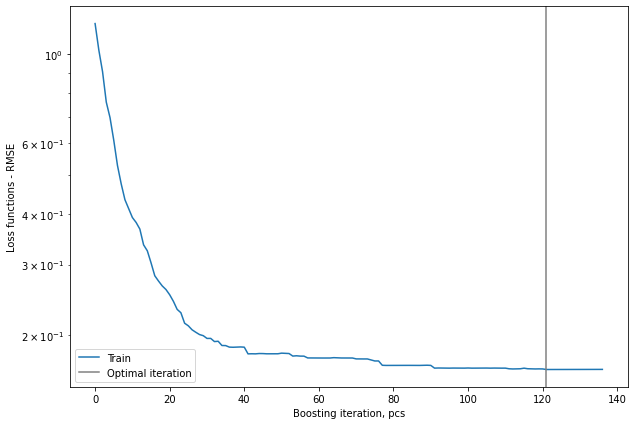

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -0.11
RMSE: 0.2
Relative RMSE(%):  -0.654
MSE: 0.0
R square: 97.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.020
a1: 0.918
R^2: 0.982
Uncertainty
a0: -0.020+/-0.014
a1: 0.918+/-0.012


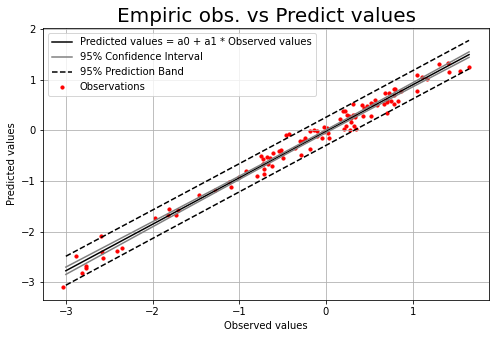

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

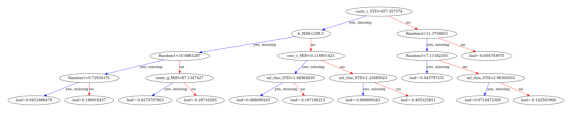

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

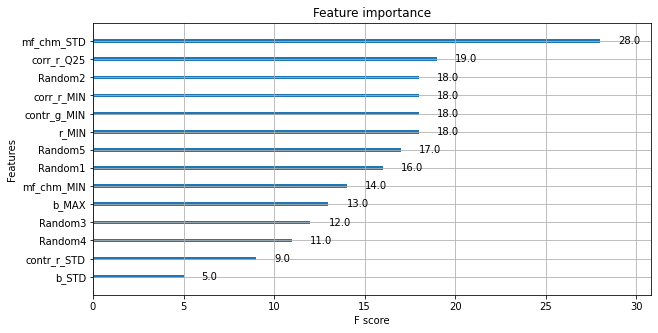

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

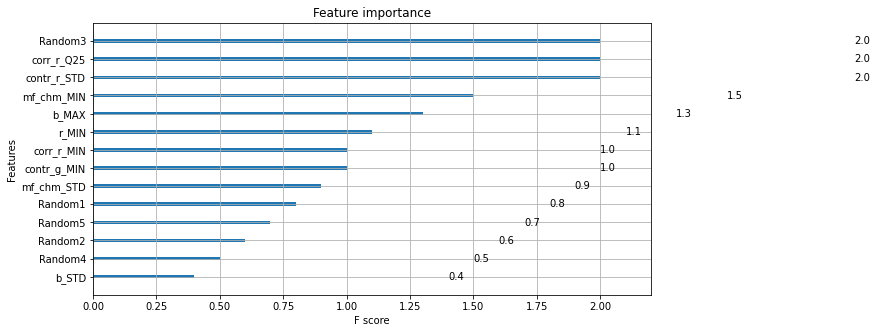

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

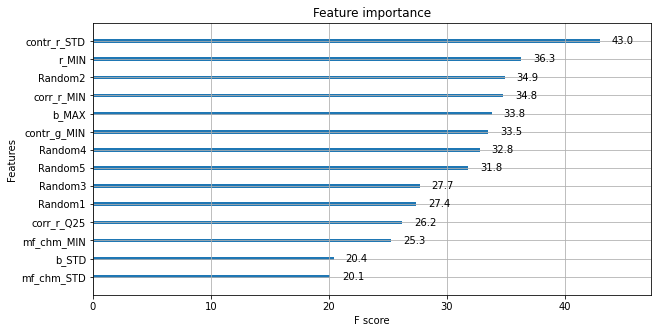

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


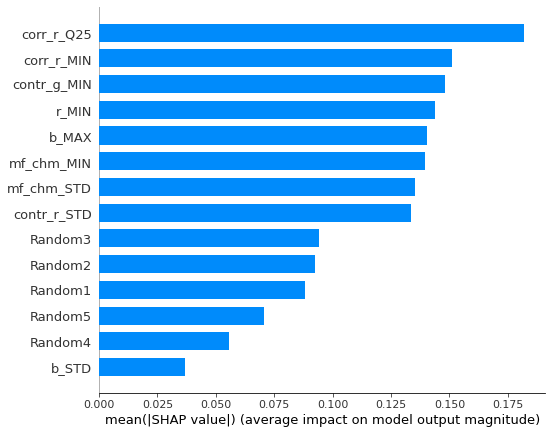

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

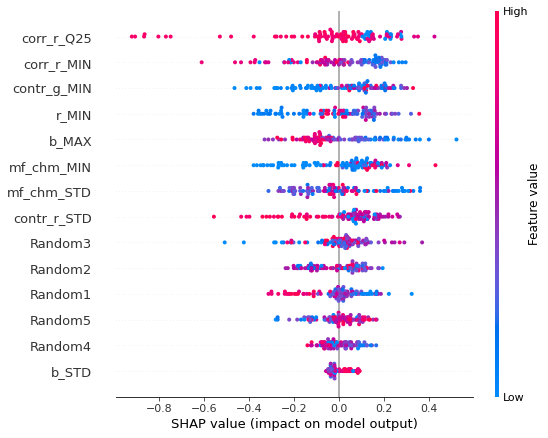

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")